###### 2020-10-20 화요일

# visualization_실습

### 목차

#### 1. 문제 01 ]

#### 2. 문제 02 ]

#### 3. 문제 03 ]

#### 4. 문제 04 ]

In [28]:
# warning 제거 옵션

import warnings
warnings.filterwarnings(action='ignore') 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime as dt

In [2]:
# 한글폰트 깨짐
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (10, 10)

# 마이너스 깨짐
mpl.rcParams['axes.unicode_minus'] = False

##### `koweps_visualization.xlsx` 데이터 불러오기

In [3]:
koweps_df = pd.read_excel('./실습데이터/koweps_visualization.xlsx')

In [4]:
# 원본데이터에서 복사본 만들기
data_df = koweps_df

In [5]:
data_df.head(10)

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,6,1,1,60101,0,NaN,2347.621959,0.706499,2322.323306,0.698885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5396.0,0,NaN
6,6,1,1,60101,0,NaN,2726.291410,0.820456,2701.699267,0.813056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,6,1,1,60101,0,NaN,1761.380403,0.530074,1713.523417,0.515672,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,6,1,1,60101,0,NaN,909.940509,0.273840,907.548817,0.273120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,6,1,1,60101,0,NaN,1025.048024,0.308480,1019.305572,0.306752,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


##### `koweps_visualization.xlsx`데이터의 Feature 정보

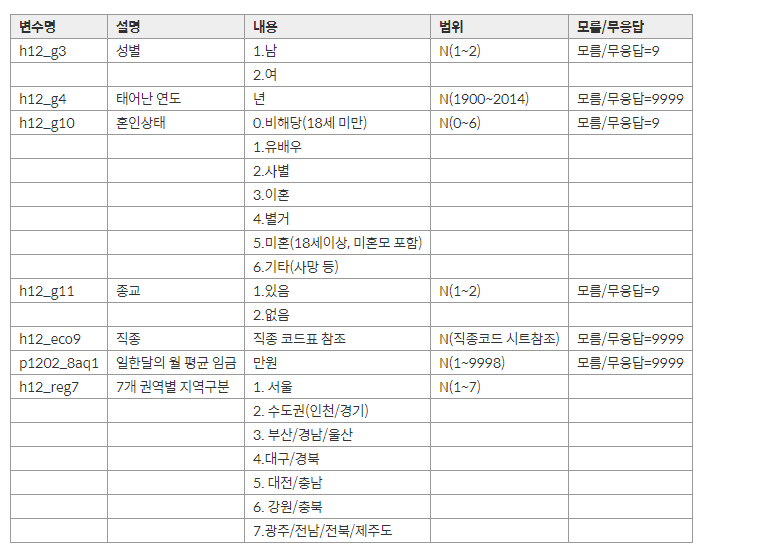

In [6]:
from IPython.display import Image

Image('./실습데이터/koweps_img.PNG')

### 문제 01 ]
   - 해당 데이터프레임에서 사용하고자 하는 칼럼(위 이미지에서 명시된 칼럼)만 추출하고, 사용하기 편한 칼럼 이름으로 rename하라

In [7]:
want_columns_df = data_df[ ['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9', 'p1202_8aq1', 'h12_reg7'] ]
want_columns_df.columns = ['성별', '태어난 연도', '혼인상태', '종교', '직종', '일한달의 월 평균 임금', '7개 권역별 지역구분']
want_columns_df.head(10)

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
5,1,1962,1,1,530.0,NaN,1
6,2,1963,1,1,NaN,NaN,1
7,2,2003,0,1,NaN,NaN,1
8,1,1927,1,1,NaN,NaN,1
9,2,1934,1,1,NaN,NaN,1


### 문제02 ]
   - 성별 데이터의 분포를 확인하고, 성별을 비율순으로 정렬하라. 그리고 시각화를 하라.
   
   
   
##### 참고 :  `plt.text(x축, y축, 입력할값)`

0 8440
1 6982


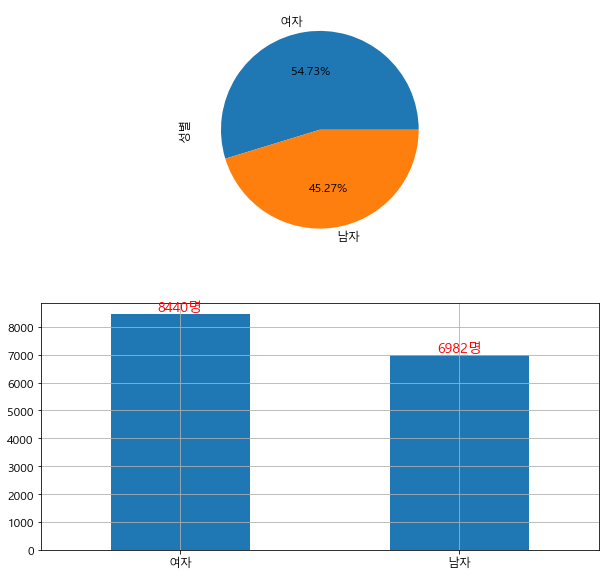

In [83]:
# 남여의 수를 세기
count_gender = want_columns_df['성별'].value_counts()
count_gender.index = ['여자', '남자']

fig, axes = plt.subplots(2, 1)

# 그래프1
# 응답자의 남여 비율 비교 : pie 그래프
count_gender.plot.pie(autopct='%.2f%%', 
                      ax=axes[0])

# 그래프 2
# 응답자의 남여 수 비교 : bar 그래프
count_gender.plot(kind='bar', 
                  ax=axes[1], 
                  rot=0)

for idx, value in enumerate(count_gender):
    print(idx, value)
    txt = '%d명' % value
    
    # plt.text(x축, y축, 입력할값)
    plt.text(idx, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='red'
            )
plt.grid()
    
    
    

### 문제 03 ] 성별에 따른 평균 급여 차이를 분석
   -  1) '성별'과 '월급' 데이터만 추출하고,
   -  2) [ 1=남 / 2=여 ]인 데이터를 '남성', '여성'으로 만들고,
   -  3) 결측치나 이상치를 확인하고 제거하는 데이터 정제과정을 거친 후,
   -  4) 성별로 그룹화하여 그룹별 평균임금을 구하고, 
   -  5) histogram을 이용해 성별에 따른 임금분포를 확인해보자

In [84]:
#### 1)'성별'과 '일한달의 월 평균 임금'칼럼만 뽑아낸다
two_df = want_columns_df[ ['성별', '일한달의 월 평균 임금'] ]
two_df.head(10)

,성별,일한달의 월 평균 임금
0,2,NaN
1,2,NaN
2,1,NaN
3,1,108.9
4,2,NaN
5,1,NaN
6,2,NaN
7,2,NaN
8,1,NaN
9,2,NaN


In [85]:
#### 2) 수치형으로된 '성별'칼럼을 문자화하라 : [ 1=남자 / 2=여자 ]
f = lambda x : '남자' if x == 1 else '여자'
two_df['성별'] = two_df['성별'].apply(f)
two_df.loc[100:120, :]

,성별,일한달의 월 평균 임금
100,남자,173.0
101,여자,NaN
102,남자,600.0
103,남자,265.0
104,여자,NaN
105,남자,NaN
106,여자,158.0
107,남자,NaN
108,여자,NaN
109,남자,NaN


In [87]:
#### 3) 결측치나 이상치를 확인하고 제거하는 데이터 정제과정을 거쳐라
# 이상치
IQR = two_df['일한달의 월 평균 임금'].quantile(q=0.75) - two_df['일한달의 월 평균 임금'].quantile(q=0.25)
lower_bound = two_df['일한달의 월 평균 임금'].quantile(q=0.25) - 1.5 * IQR
upper_bound = two_df['일한달의 월 평균 임금'].quantile(q=0.75) + 1.5 * IQR

no_outlier_index = ( two_df['일한달의 월 평균 임금'] < upper_bound ) | ( two_df['일한달의 월 평균 임금'] > lower_bound )
erase_outlier_df = two_df.loc[ no_outlier_index, : ]

# 결측치
NaN_index = pd.notnull(erase_outlier_df['일한달의 월 평균 임금'])
refine_df = erase_outlier_df.loc[ NaN_index, : ]

refine_df.head()

,성별,일한달의 월 평균 임금
3,남자,108.9
10,여자,20.0
16,남자,322.0
17,여자,120.0
24,남자,300.0


,성별에따른 평균 임금
성별,
남자,333.280785
여자,175.293108


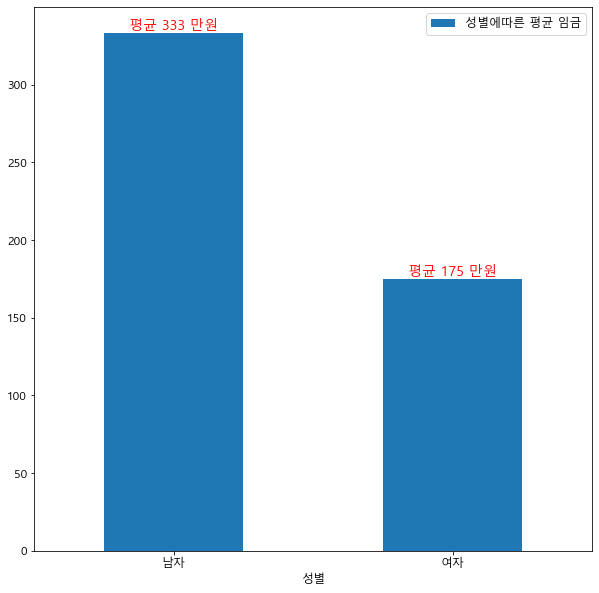

In [93]:
#### 4) 성별로 그룹화 하여 그룹별 평균임금을 구하라.
average_imgeum = refine_df.groupby('성별').agg(np.mean)
average_imgeum.columns = ['성별에따른 평균 임금']
display(average_imgeum.head(10))


average_imgeum.plot(kind='bar', rot=0)
for idx, value in enumerate(average_imgeum['성별에따른 평균 임금']):
    txt = '평균 %d 만원' % value
    plt.text(idx, value, txt,
            horizontalalignment='center',
            verticalalignment='bottom',
            fontsize=14,
            color='red')

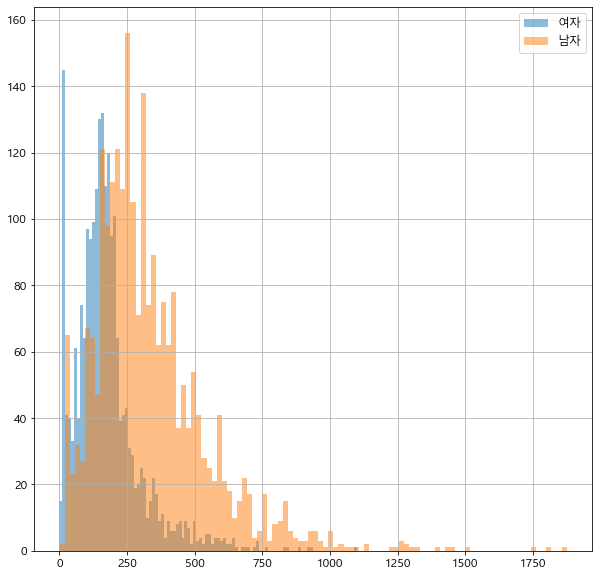

In [89]:
#### 5) histogram을 이용해 성별에 따른 임금분포를 확인하라.
gender_list = ['여자', '남자']
for gender in gender_list:
    use_df = refine_df[ refine_df['성별'] == gender ]
    plt.hist(use_df['일한달의 월 평균 임금'], bins=100, label=gender, alpha=0.5)
plt.legend()
plt.grid()

### 문제 04 ] 나이에 따른 평균급여 변화
   - 1) 태어난 년도, 월급에 대한 칼럼을 추출하고 나이를 계산하여 파생변수를 추가하라.
   - 2) 결측값 확인, 결측치제거, 이상치 결측처리
   - 3) 나이에 따른 급여평균
   - 4) 데이터시각화

In [30]:
# 1) 태어난 년도, 월급에 대한 칼럼을 추출하고 나이를 계산하여 파생변수를 추가하라.
year_imgeum_df = want_columns_df[ ['태어난 연도', '일한달의 월 평균 임금'] ]
year_imgeum_df['만_나이'] = 2020 - year_imgeum_df['태어난 연도'].apply(int)


In [44]:
# 2) 결측값 확인, 결측치 제거, 이상치 결측처리

# 결측값 확인
year_imgeum_df.apply(pd.isnull, axis=0).apply(sum, axis=0)  # '일한달의 월 평균 임금' 칼럼에서만 결측치 확인

# 결측치 제거
no_null_index = pd.notnull(year_imgeum_df['일한달의 월 평균 임금'])
for_nan_index = year_imgeum_df.loc[ no_null_index ,: ]

# 이상치 결측처리
q3 = refine_df01['일한달의 월 평균 임금'].quantile(q=0.75)
q1 = refine_df01['일한달의 월 평균 임금'].quantile(q=0.25)
IQR = q3 - q1
upper_bound = q3 + 1.5 * IQR
lower_bound = q1 - 1.5 * IQR

for_nan_index = ( refine_df01['일한달의 월 평균 임금'] > upper_bound ) | ( refine_df01['일한달의 월 평균 임금'] < lower_bound )
refine_df01.loc[ for_nan_index, ['일한달의 월 평균 임금'] ] = np.NaN

refine_df01.head(10)

,태어난 연도,일한달의 월 평균 임금,만_나이
3,1942,108.9,78
10,1940,20.0,80
16,1978,322.0,42
17,1975,120.0,45
24,1975,300.0,45
27,1961,100.0,59
29,1986,200.0,34
30,1962,130.0,58
31,1985,150.0,35
36,1971,250.0,49


,태어난 연도,일한달의 월 평균 임금
만_나이,,
22,1998,89.333333
23,1997,136.720000
24,1996,140.807692
25,1995,138.000000
26,1994,145.652000
27,1993,166.666667
28,1992,176.439344
29,1991,179.716471
30,1990,201.438158


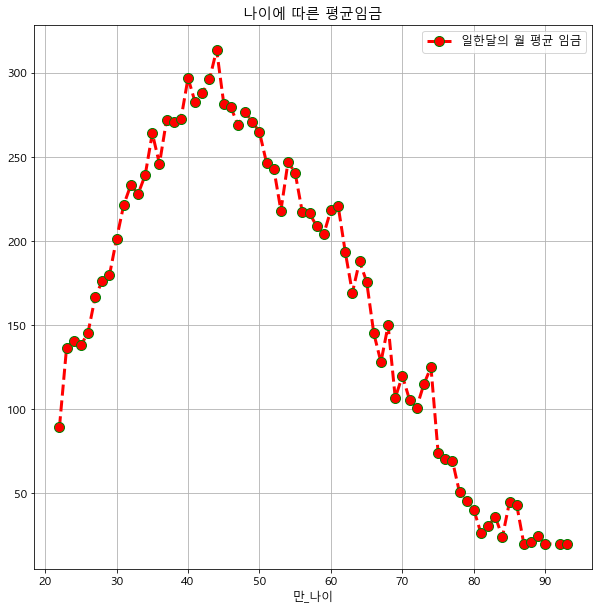

In [91]:
# 3) 나이에 따른 급여평균
imgeum_by_age = refine_df01.groupby('만_나이').agg(np.mean)
display(imgeum_by_age.head(10))


# 4) 데이터시각화
imgeum_by_age[['일한달의 월 평균 임금']].plot(c='red',
                                              lw=3,
                                              ls='--',
                                              marker='o',
                                              ms=10,
                                              mec='g',
                                              mfc='r')
plt.title('나이에 따른 평균임금')
plt.grid()

